# IPL Data Analysis using ML

##### Author : Shriraj Nannaware 

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

# Importing Dataset

In [3]:
data=pd.read_csv('matches.csv')
data

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [6]:
data1=pd.read_csv('deliveries.csv')
data1

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [8]:
data1.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

# Data Cleaning

In [9]:
# Dropping umpire3 column
data=data.drop(columns=['umpire3'])
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [10]:
data[data.city.isnull()][['city','venue']]

,city,venue
461,NaN,Dubai International Cricket Stadium
462,NaN,Dubai International Cricket Stadium
466,NaN,Dubai International Cricket Stadium
468,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
474,NaN,Dubai International Cricket Stadium
476,NaN,Dubai International Cricket Stadium


In [11]:
#filling null values in city column
data.city = data.city.fillna('Dubai')

In [12]:
data=data.dropna()
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong


In [13]:
data.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [14]:
data.shape

(750, 17)

In [15]:
data1=data1.drop(columns=['player_dismissed','dismissal_kind','fielder'])
data1

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2


In [16]:
#merging the two datasets
complete_data = pd.merge(data1,data, left_on='match_id', right_on ='id')
complete_data

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178201,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould
178202,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould
178203,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould
178204,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould


In [17]:
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178206 entries, 0 to 178205
Data columns (total 35 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   match_id         178206 non-null  int64 
 1   inning           178206 non-null  int64 
 2   batting_team     178206 non-null  object
 3   bowling_team     178206 non-null  object
 4   over             178206 non-null  int64 
 5   ball             178206 non-null  int64 
 6   batsman          178206 non-null  object
 7   non_striker      178206 non-null  object
 8   bowler           178206 non-null  object
 9   is_super_over    178206 non-null  int64 
 10  wide_runs        178206 non-null  int64 
 11  bye_runs         178206 non-null  int64 
 12  legbye_runs      178206 non-null  int64 
 13  noball_runs      178206 non-null  int64 
 14  penalty_runs     178206 non-null  int64 
 15  batsman_runs     178206 non-null  int64 
 16  extra_runs       178206 non-null  int64 
 17  total_runs

In [18]:
complete_data.isnull().sum()

match_id           0
inning             0
batting_team       0
bowling_team       0
over               0
ball               0
batsman            0
non_striker        0
bowler             0
is_super_over      0
wide_runs          0
bye_runs           0
legbye_runs        0
noball_runs        0
penalty_runs       0
batsman_runs       0
extra_runs         0
total_runs         0
id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

# Data Analysis and Visualization

In [19]:
wins_per_season = data.groupby("season")["winner"].value_counts()
wins_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

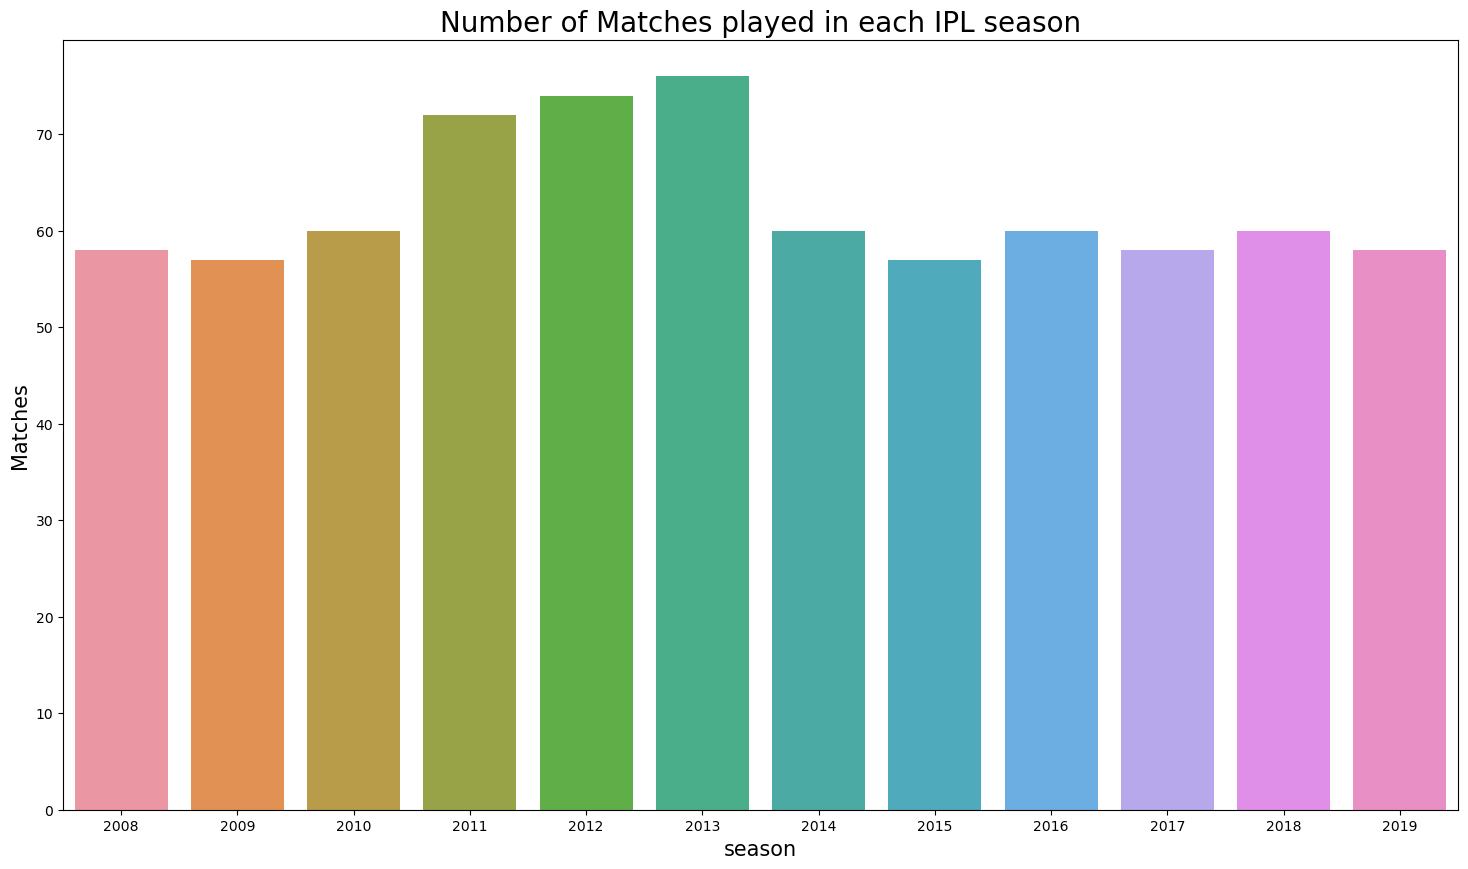

In [20]:
# No of matches played in each ipl season
plt.figure(figsize = (18,10))
sns.countplot(x='season',data=data)
plt.title("Number of Matches played in each IPL season",fontsize=20)
plt.xlabel("season",fontsize=15)
plt.ylabel('Matches',fontsize=15)
plt.show()

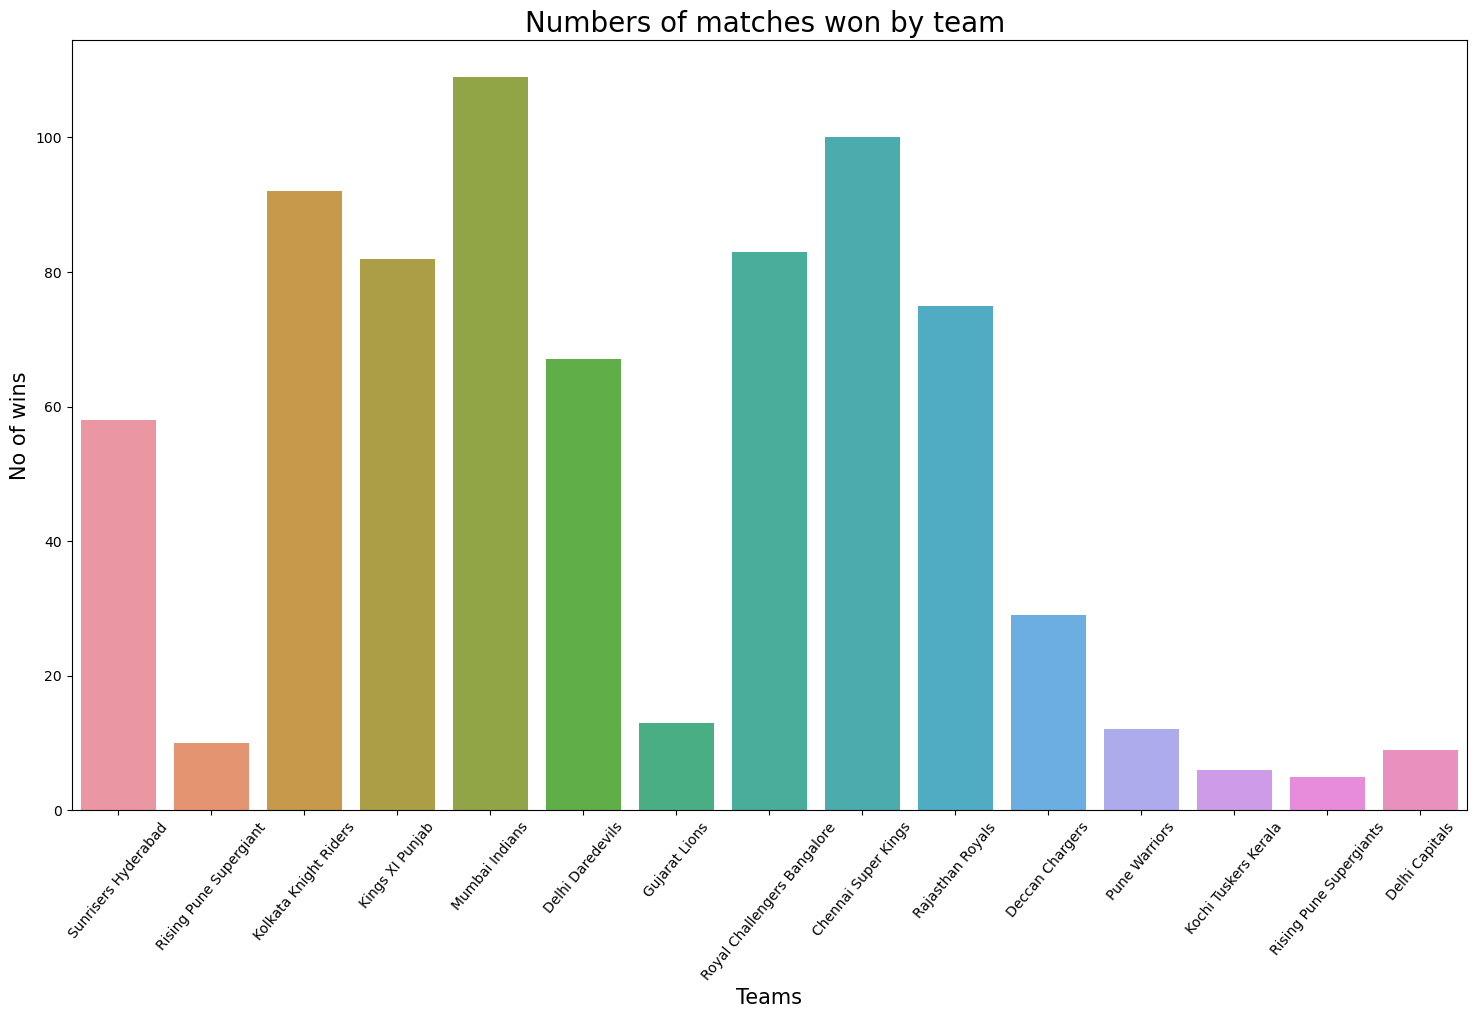

In [21]:
# No of matches won by each team
plt.figure(figsize = (18,10))
sns.countplot(x='winner',data=data)
plt.title("Numbers of matches won by team ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Teams",fontsize=15)
plt.ylabel("No of wins",fontsize=15)
plt.show()

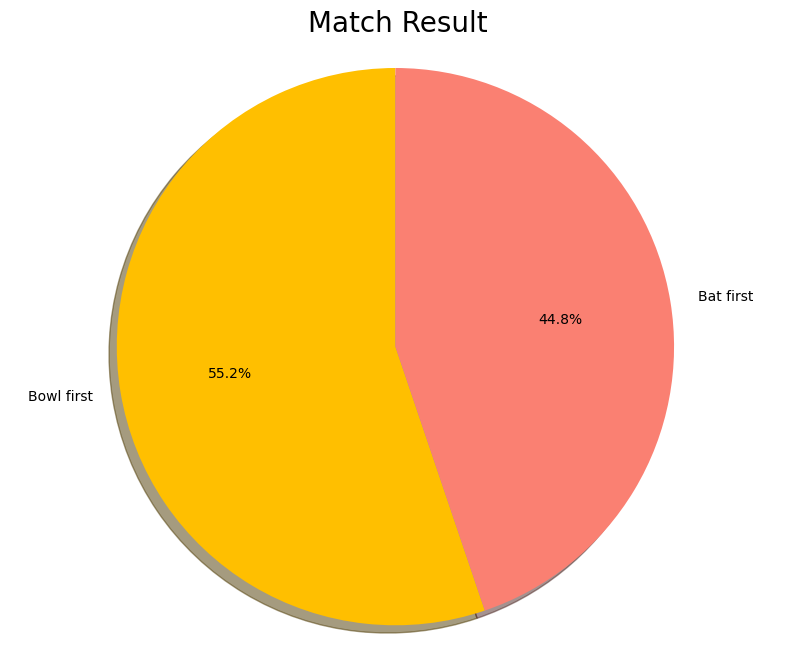

In [22]:
# match result
data['win_by']=np.where(data['win_by_runs']>0,'Bat first','Bowl first')
Win=data.win_by.value_counts()
labels=np.array(Win.index)
sizes = Win.values
colors = ['#FFBF00', '#FA8072']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Match Result',fontsize=20)
plt.axis('equal')
plt.show()

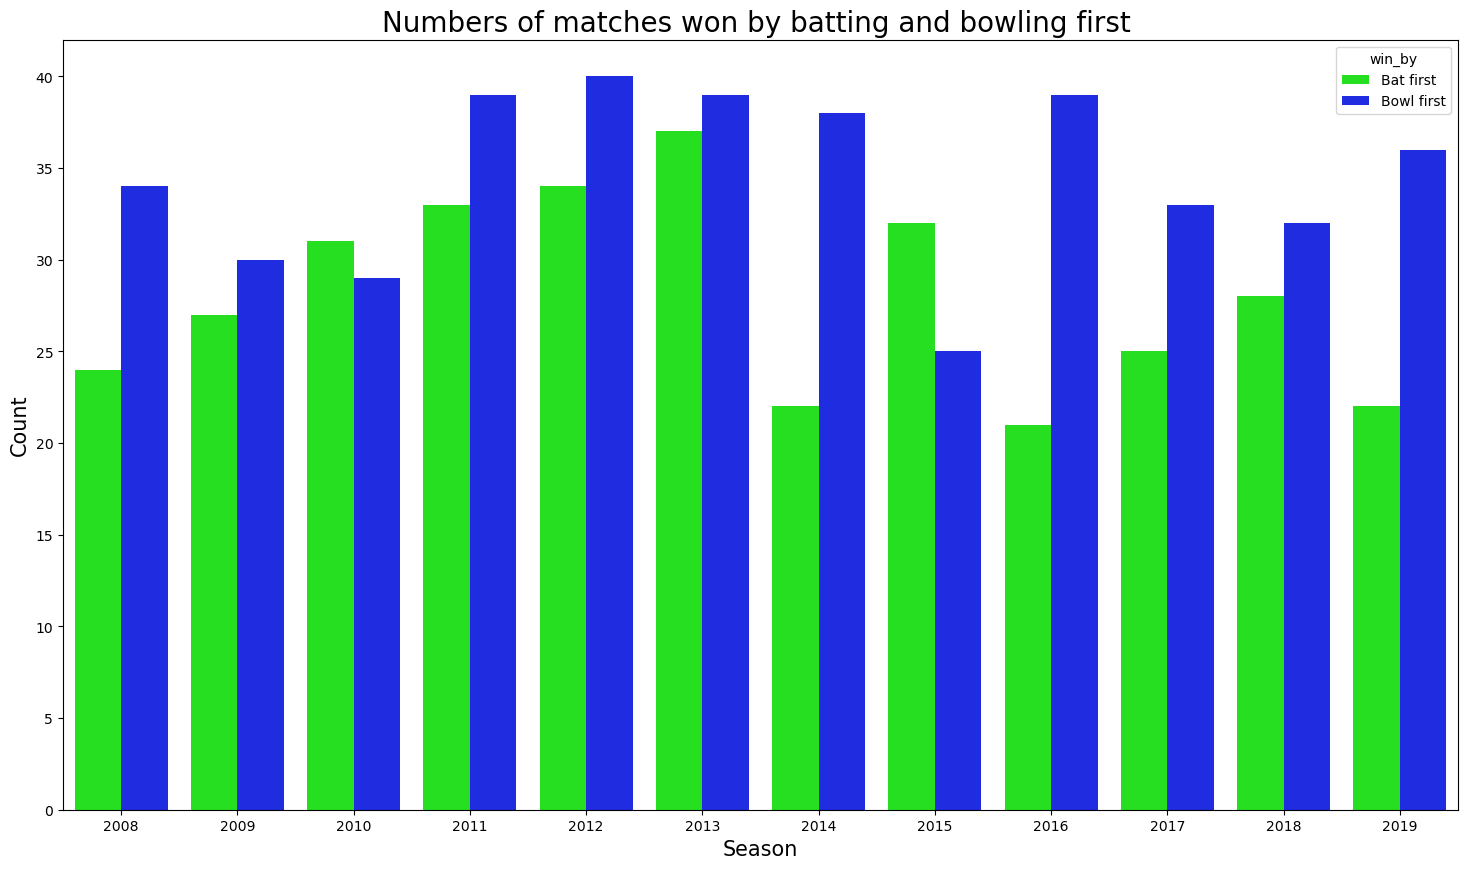

In [23]:
# No of matches won by batting and bowling first
plt.figure(figsize = (18,10))
sns.countplot('season',hue='win_by',data=data,palette='hsv')
plt.title("Numbers of matches won by batting and bowling first ",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

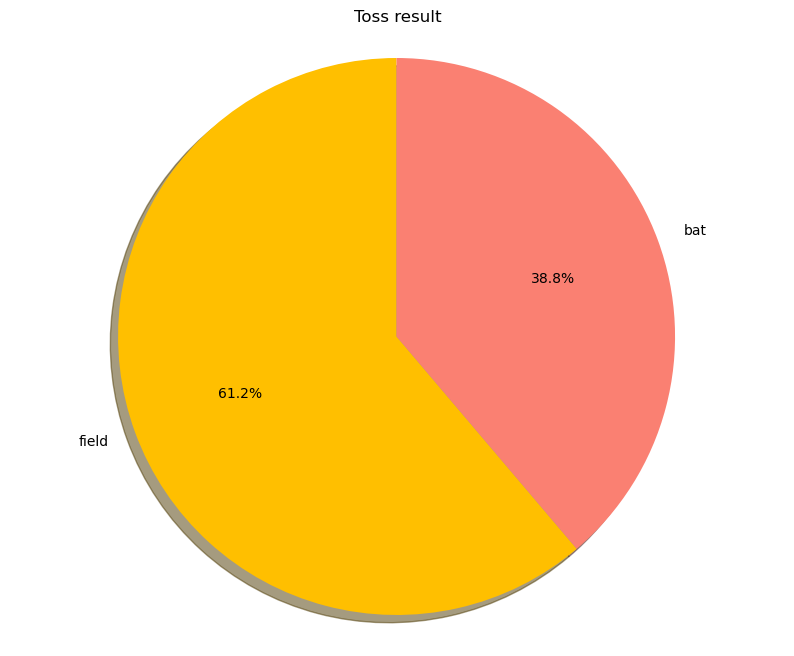

In [24]:
# toss result
Toss=data.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
colors = ['#FFBF00', '#FA8072']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Toss result')
plt.axis('equal')
plt.show()

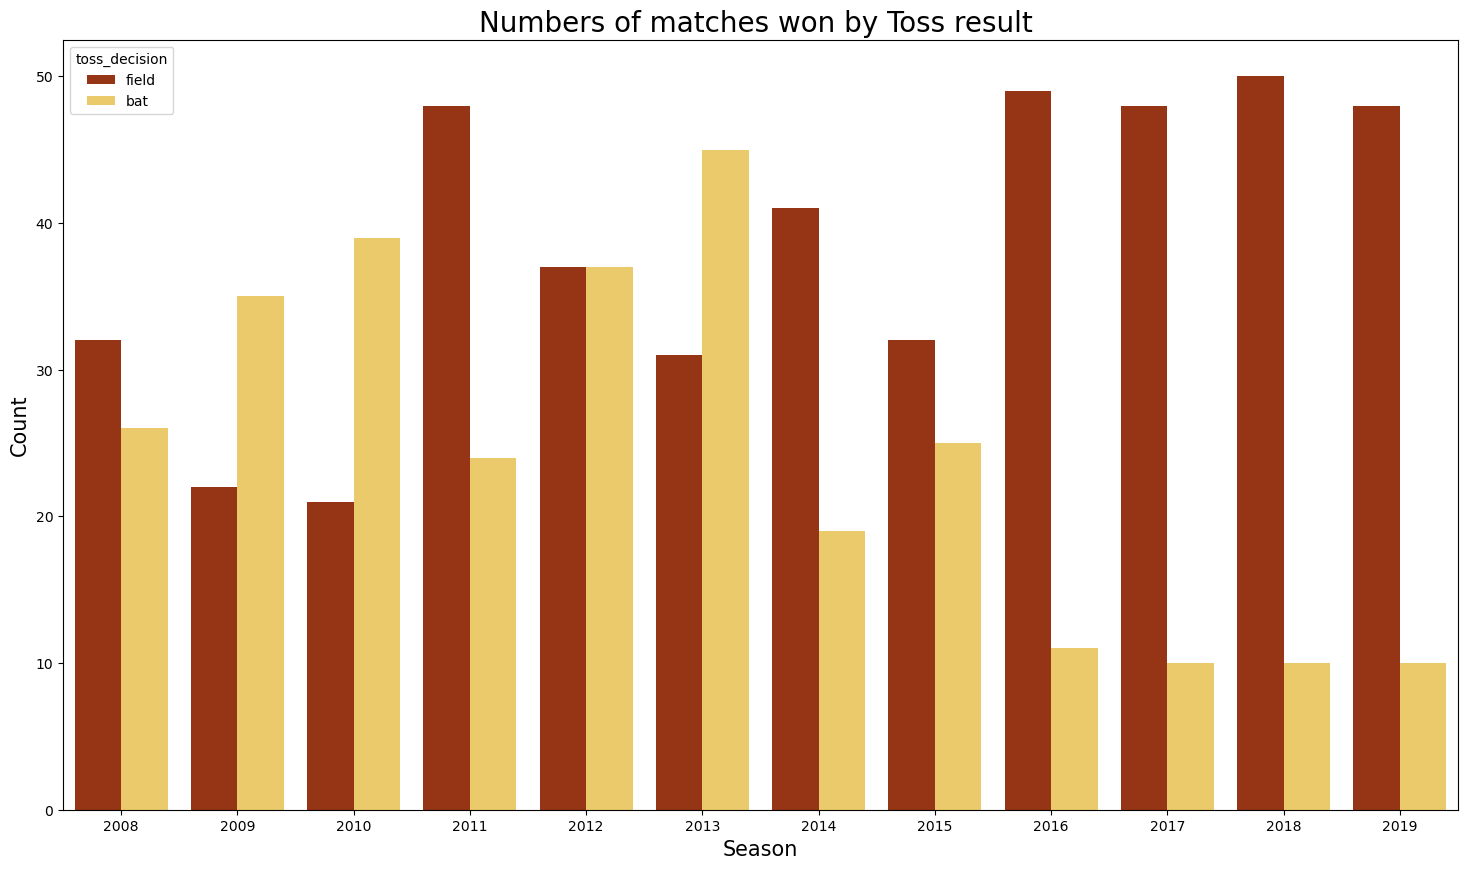

In [25]:
# No of matches won by toss result
plt.figure(figsize = (18,10))
sns.countplot('season',hue='toss_decision',data=data,palette='afmhot')
plt.title("Numbers of matches won by Toss result ",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

In [26]:
# Printing season wise winner
final_matches=data.drop_duplicates(subset=['season'], keep='last')

final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


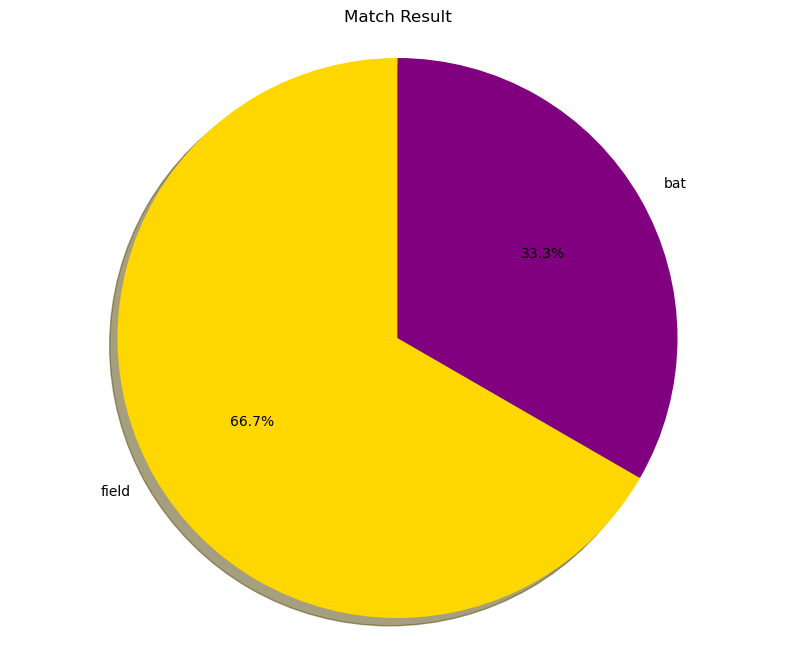

In [27]:
# Plotting pie chart on Winning percentage in final
match = final_matches.win_by.value_counts()
labels=np.array(Toss.index)
sizes = match.values
colors = ['gold', 'purple']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Match Result')
plt.axis('equal')
plt.show()

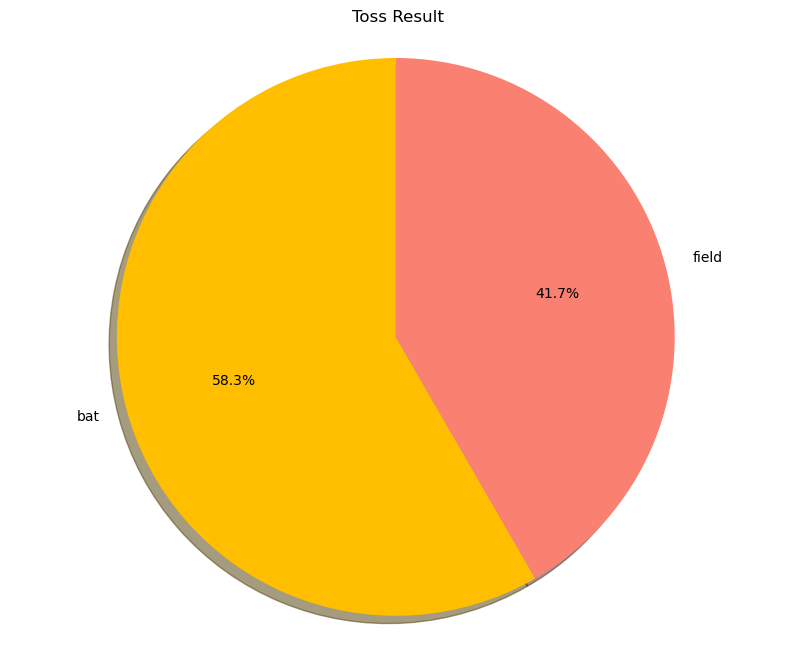

In [28]:
#Plotting pie chart on Winning percentage in final by toss
Toss=final_matches.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
colors = ['#FFBF00', '#FA8072']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Toss Result')
plt.axis('equal')
plt.show()

<Figure size 1800x1000 with 0 Axes>

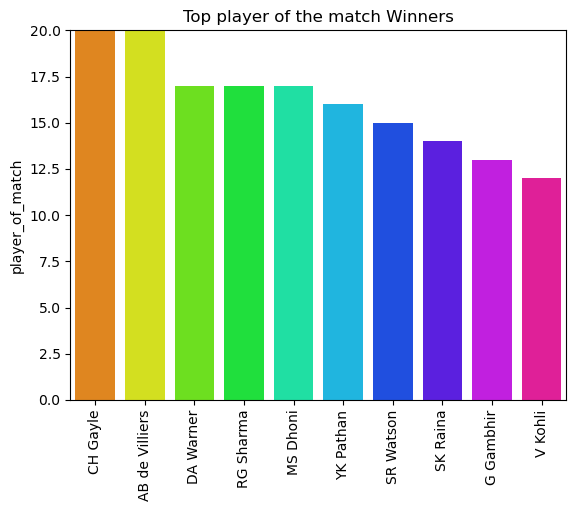

In [29]:
# Name of top player in IPL
plt.figure(figsize = (18,10))
top_players = data.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="hsv");
plt.show()

In [30]:
# IPL Finals venues and winners along with the number of wins.
final_matches.groupby(['city','winner']).size()

city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

In [31]:
# Number of season won by teams
final_matches["winner"].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

In [32]:
# Printing toss winner, toss decision, winner in final matches.
final_matches[['toss_winner','toss_decision','winner']].reset_index(drop=True)

,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad
